In [9]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ecommerce_dataset_10000.csv")

#Create SQLite connection in memory
conn = sqlite3.connect(":memory:")

# Load dataframe into SQL table
df.to_sql("orders", conn, index=False, if_exists="replace")

10000

In [10]:
# Display the first 5 rows
display(df.head())

# Display the column names and their data types
display(df.info())

# Display descriptive statistics for numerical columns
display(df.describe())

,customer_id,first_name,last_name,gender,age_group,signup_date,country,product_id,product_name,category,quantity,unit_price,order_id,order_date,order_status,payment_method,rating,review_text,review_id,review_date
0,CUST2353,Erica,Oliver,Female,Teenagers,2022-06-29,Canada,PROD108,Fitbit Versa 3,Electronics,3,229,ORD10000,2023-07-13,Pending,Credit Card,2,good,REV20000,2025-06-06
1,CUST4463,Christopher,White,Male,Adults,2023-08-24,China,PROD103,Levi's Jeans,Apparel,4,59,ORD10001,2024-08-12,Pending,PayPal,2,average,REV20001,2023-08-05
2,CUST4512,Spencer,Foster,Male,Senior,2023-07-18,Germany,PROD111,Lego Star Wars Set,Toys,2,59,ORD10002,2024-08-04,Delivered,Cash on Delivery,5,good,REV20002,2023-01-03
3,CUST5711,Jessica,Harris,Male,Teenagers,2025-08-22,France,PROD107,Dyson Vacuum,Home & Kitchen,4,399,ORD10003,2025-05-23,Delivered,Cash on Delivery,2,very good,REV20003,2023-03-14
4,CUST1296,Amy,Johnson,Female,Teenagers,2021-03-23,Brazil,PROD105,Adidas Running Shoes,Apparel,1,110,ORD10004,2023-07-02,Returned,Cash on Delivery,1,very good,REV20004,2023-10-18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     10000 non-null  object
 1   first_name      10000 non-null  object
 2   last_name       10000 non-null  object
 3   gender          10000 non-null  object
 4   age_group       10000 non-null  object
 5   signup_date     10000 non-null  object
 6   country         10000 non-null  object
 7   product_id      10000 non-null  object
 8   product_name    10000 non-null  object
 9   category        10000 non-null  object
 10  quantity        10000 non-null  int64 
 11  unit_price      10000 non-null  int64 
 12  order_id        10000 non-null  object
 13  order_date      10000 non-null  object
 14  order_status    10000 non-null  object
 15  payment_method  10000 non-null  object
 16  rating          10000 non-null  int64 
 17  review_text     10000 non-null  object
 18  review_

None

,quantity,unit_price,rating
count,10000.000000,10000.000000,10000.000000
mean,3.000800,246.647200,2.993100
std,1.416474,282.605391,1.410621
min,1.000000,25.000000,1.000000
25%,2.000000,80.000000,2.000000
50%,3.000000,129.000000,3.000000
75%,4.000000,229.000000,4.000000
max,5.000000,999.000000,5.000000


**1. Total Customers by Country**

Objective: To identify the countries with the largest customer base. This analysis helps in understanding the geographical distribution of <br>
customers and can inform targeted marketing strategies.

In [11]:
query = """
SELECT country, COUNT(DISTINCT customer_id) AS total_customers
FROM orders
GROUP BY country
ORDER BY total_customers DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, conn)
display(result)

,country,total_customers
0,China,458
1,India,449
2,Japan,445
3,Australia,443
4,France,442
5,Canada,438
6,Brazil,428
7,USA,422
8,UK,409
9,Germany,393


<function matplotlib.pyplot.show(close=None, block=None)>

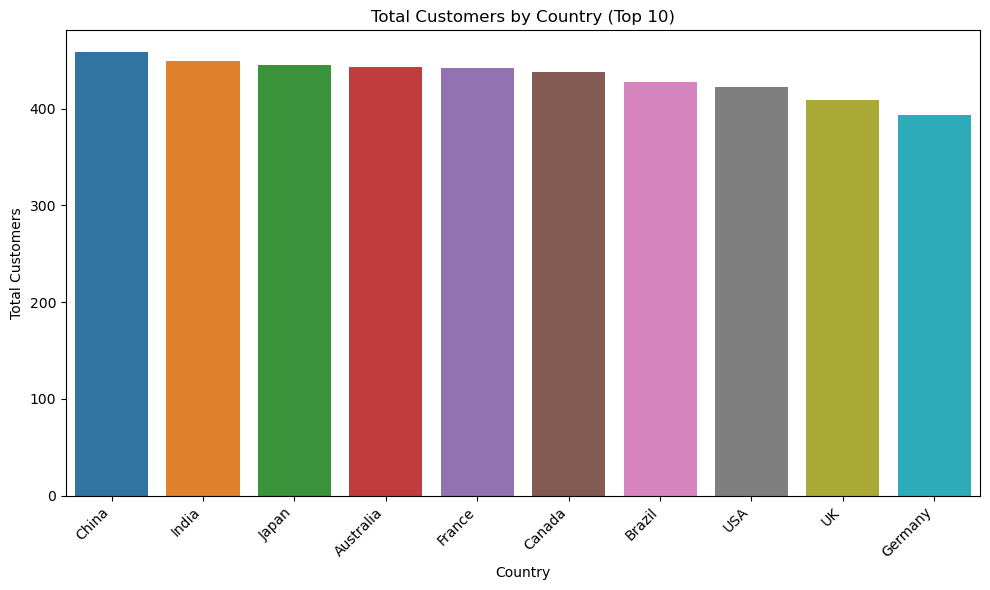

In [15]:
# Visualize total customers by country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='total_customers', data=result, hue='country' ,legend=False) 
plt.title('Total Customers by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show

Analysis: This query calculates the total number of unique customers for each country and shows the top 10 countries with the most customers. This analysis helps identify the largest customer bases by country, which can be valuable for targeted marketing or understanding market penetration in different regions.

**2. Sales Performance by Country**

Objective: To identify the top-performing countries in terms of total sales revenue. This helps in understanding market distribution and focusing marketing efforts.

In [16]:
query = """
SELECT
    country,
    SUM(quantity * unit_price) AS total_revenue,
    COUNT(DISTINCT order_id) AS total_orders
FROM
    orders
GROUP BY
    country
ORDER BY
    total_revenue DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, conn)
display(result)

,country,total_revenue,total_orders
0,China,815789,1054
1,France,810303,1060
2,Japan,777673,976
3,USA,767017,987
4,India,759619,1036
5,Australia,745407,1043
6,Brazil,743066,1019
7,Canada,719928,997
8,UK,676570,943
9,Germany,635391,885


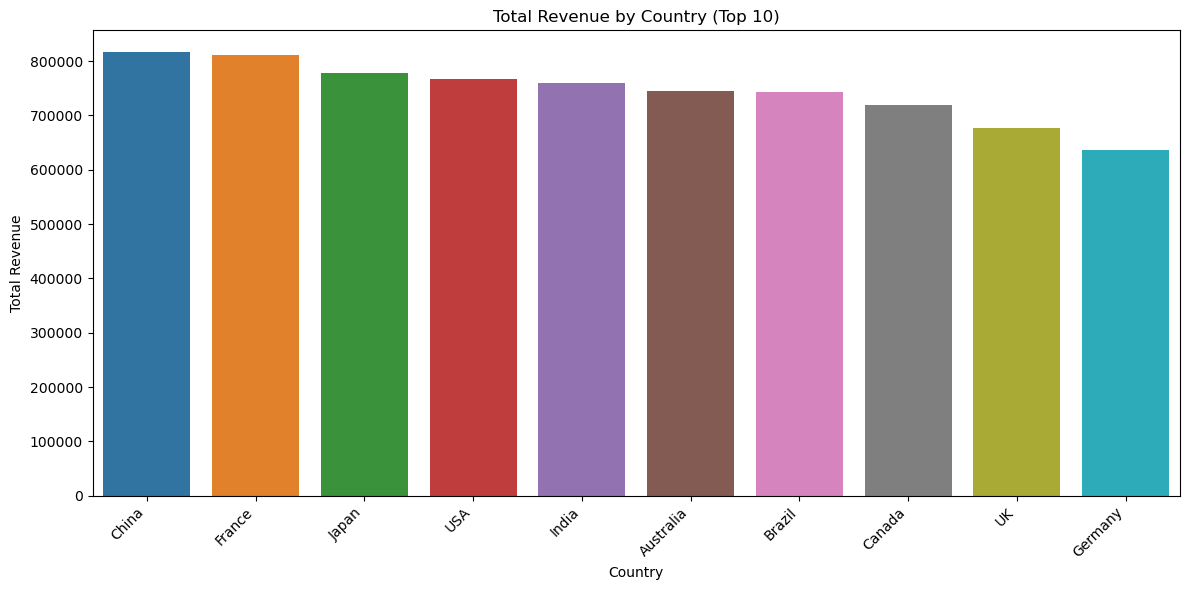

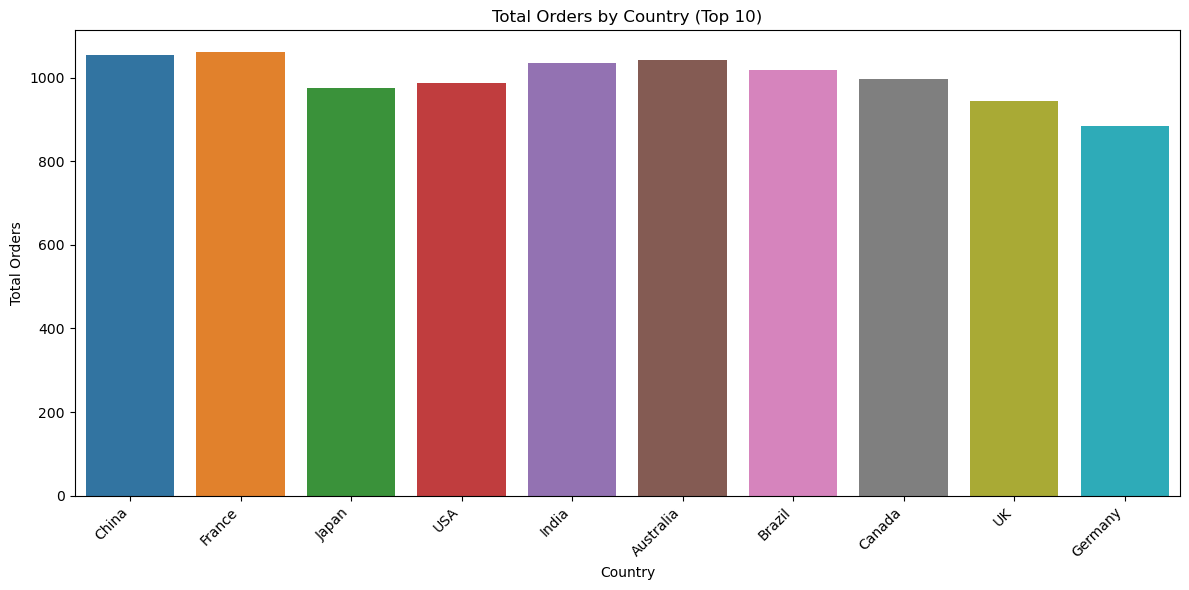

In [19]:
# Visualize total revenue by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_revenue', data=result, hue='country' ,legend=False)
plt.title('Total Revenue by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize total orders by country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='total_orders', data=result, hue='country' ,legend=False)
plt.title('Total Orders by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: This query calculates the total revenue and the number of unique orders for each country. By ranking the countries by revenue, we can quickly see which markets are the most valuable to the business. The results will highlight the key geographical areas driving sales.

In [49]:
# List product_name and total quantity sold for each product.
query= """

SELECT 
    product_name, 
    SUM(quantity) AS total_quantity_sold
FROM orders
GROUP BY product_name
ORDER BY total_quantity_sold DESC;
"""
result = pd.read_sql_query(query, conn)

result

,product_name,total_quantity_sold
0,Dyson Vacuum,2196
1,Sony Headphones,2136
2,Adidas Running Shoes,2093
3,Levi's Jeans,2074
4,Nike Air Max,2042
5,Harry Potter Box Set,2016
6,Samsung Galaxy S23,1981
7,Kindle Paperwhite,1973
8,Instant Pot,1954
9,Lego Star Wars Set,1953


**3. Most Popular Product Categories**

Objective: To determine which product categories generate the most sales. This information is crucial for inventory management, marketing strategies, and product development.

In [21]:
query = """
SELECT
    category,
    SUM(quantity) AS total_units_sold,
    SUM(quantity * unit_price) AS total_revenue
FROM
    orders
GROUP BY
    category
ORDER BY
    total_revenue DESC;
"""
result = pd.read_sql_query(query, conn)
display(result)

,category,total_units_sold,total_revenue
0,Electronics,7934,4529986
1,Home & Kitchen,4150,1069650
2,Apparel,6209,597636
3,Toys,3886,499894
4,Books,3989,415797
5,Sports,3840,337800


In [52]:
 #rank products by total revenue within each category.
query="""
SELECT 
    product_id,
    product_name,
    category,
    SUM(quantity * unit_price) AS total_revenue,
    RANK() OVER (PARTITION BY category ORDER BY SUM(quantity * unit_price) DESC) AS revenue_rank
FROM orders
GROUP BY product_id, product_name, category
ORDER BY category, revenue_rank;

"""
result = pd.read_sql_query(query, conn)

result

,product_id,product_name,category,total_revenue,revenue_rank
0,PROD104,Nike Air Max,Apparel,245040,1
1,PROD105,Adidas Running Shoes,Apparel,230230,2
2,PROD103,Levi's Jeans,Apparel,122366,3
3,PROD109,Kindle Paperwhite,Books,254517,1
4,PROD110,Harry Potter Box Set,Books,161280,2
5,PROD100,iPhone 14,Electronics,1881117,1
6,PROD101,Samsung Galaxy S23,Electronics,1780919,2
7,PROD108,Fitbit Versa 3,Electronics,442886,3
8,PROD102,Sony Headphones,Electronics,425064,4
9,PROD107,Dyson Vacuum,Home & Kitchen,876204,1


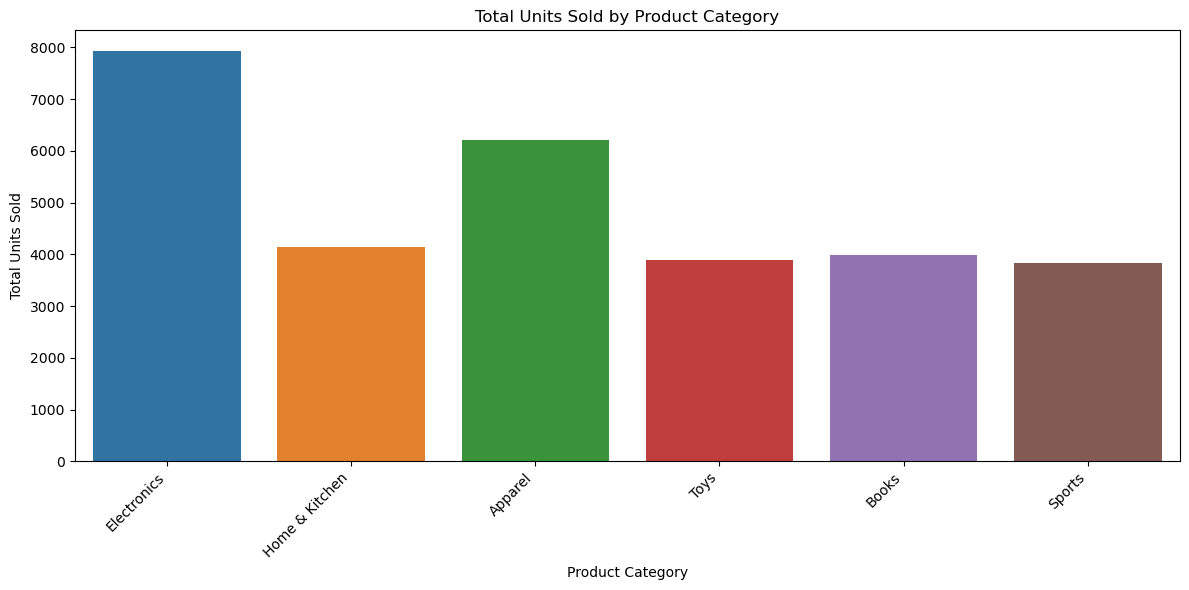

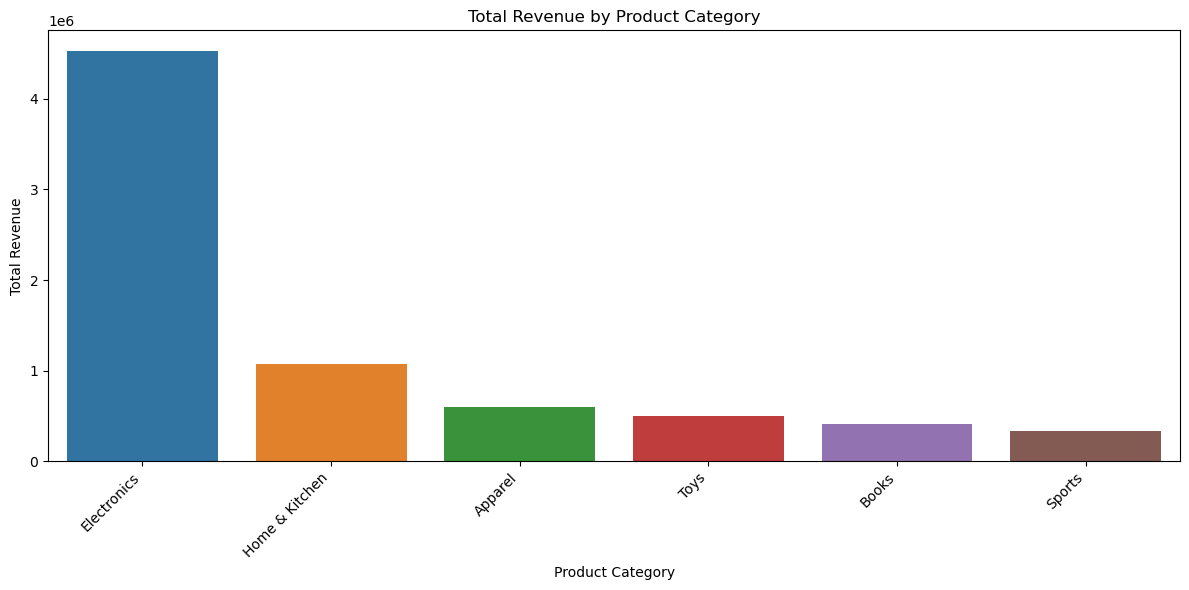

In [23]:
# Visualize total units sold by category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_units_sold', data=result, hue='category' ,legend=False)
plt.title('Total Units Sold by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Units Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize total revenue by category
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='total_revenue', data=result, hue='category' ,legend=False)
plt.title('Total Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: This query aggregates sales data by product category. It shows not only the revenue generated by each category but also the total number of units sold. This helps to distinguish between high-volume, low-price categories and low-volume, high-price categories.

**4. Customer Demographics: Age Group Distribution**

Objective: To understand the age distribution of the customer base. This insight is vital for tailoring marketing campaigns and product offerings to the right audience.

In [24]:
query = """
SELECT
    age_group,
    COUNT(DISTINCT customer_id) AS number_of_customers,
    ROUND(AVG(rating), 2) AS average_rating
FROM
    orders
GROUP BY
    age_group
ORDER BY
    number_of_customers DESC;
"""
result = pd.read_sql_query(query, conn)
display(result)

,age_group,number_of_customers,average_rating
0,Senior,1449,2.95
1,Teenagers,1444,3.01
2,Adults,1434,3.02


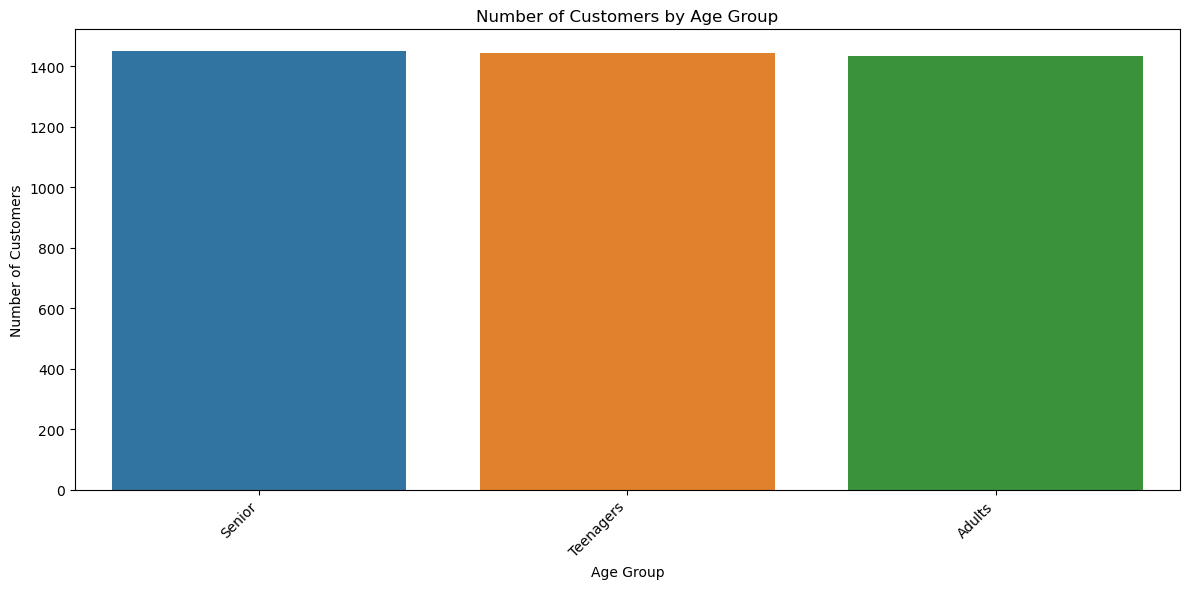

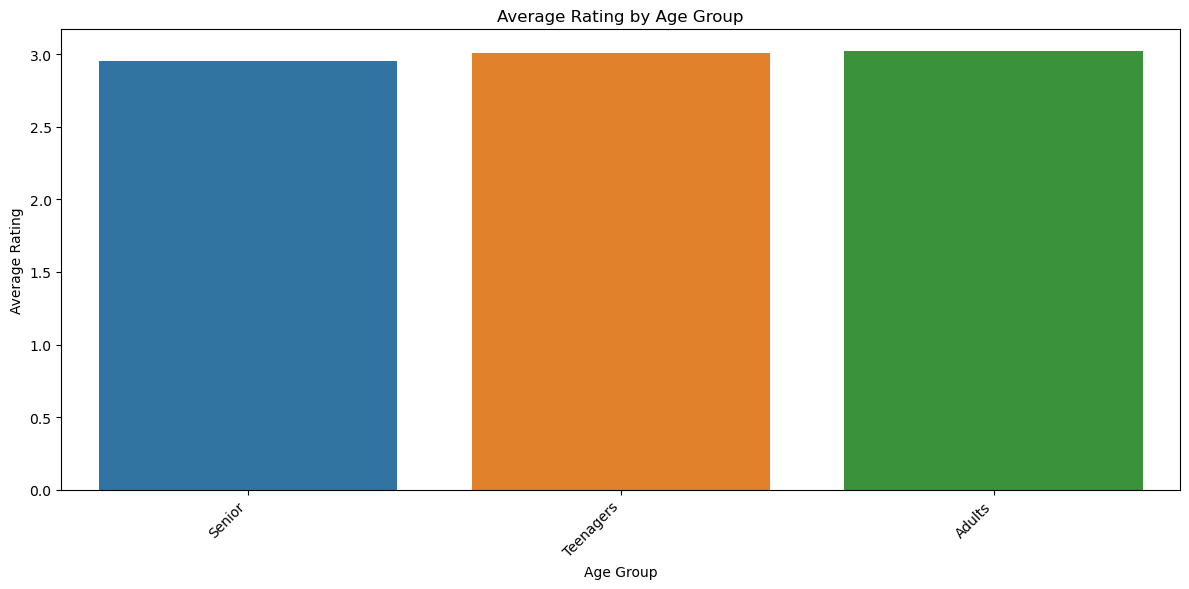

In [28]:
# Plot number of customers by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='number_of_customers', data=result, hue='age_group' ,legend=False)
plt.title('Number of Customers by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot average rating by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='average_rating', data=result, hue='age_group' ,legend=False)
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Analysis: This query counts the number of unique customers in each age group and calculates their average product rating. It helps identify the primary age demographic and their general satisfaction level, which can inform user acquisition and retention strategies.

In [50]:
# Find the average rating of each product category.
query= """

SELECT 
    category, 
    ROUND(AVG(rating), 2) AS avg_rating
FROM orders
GROUP BY category
ORDER BY avg_rating DESC;
"""
result = pd.read_sql_query(query, conn)

result

,category,avg_rating
0,Electronics,3.02
1,Toys,3.01
2,Books,3.01
3,Apparel,2.98
4,Home & Kitchen,2.97
5,Sports,2.94


**5. Order Status Overview**

Objective: To get a snapshot of the current status of all orders. This is a key operational metric for evaluating fulfillment efficiency and identifying potential bottlenecks.

In [31]:
query = """
SELECT
    order_status,
    COUNT(order_id) AS number_of_orders
FROM
    orders
GROUP BY
    order_status
ORDER BY
    number_of_orders DESC;
"""
result = pd.read_sql_query(query, conn)
display(result)

,order_status,number_of_orders
0,Shipped,2063
1,Delivered,2037
2,Cancelled,1970
3,Pending,1968
4,Returned,1962


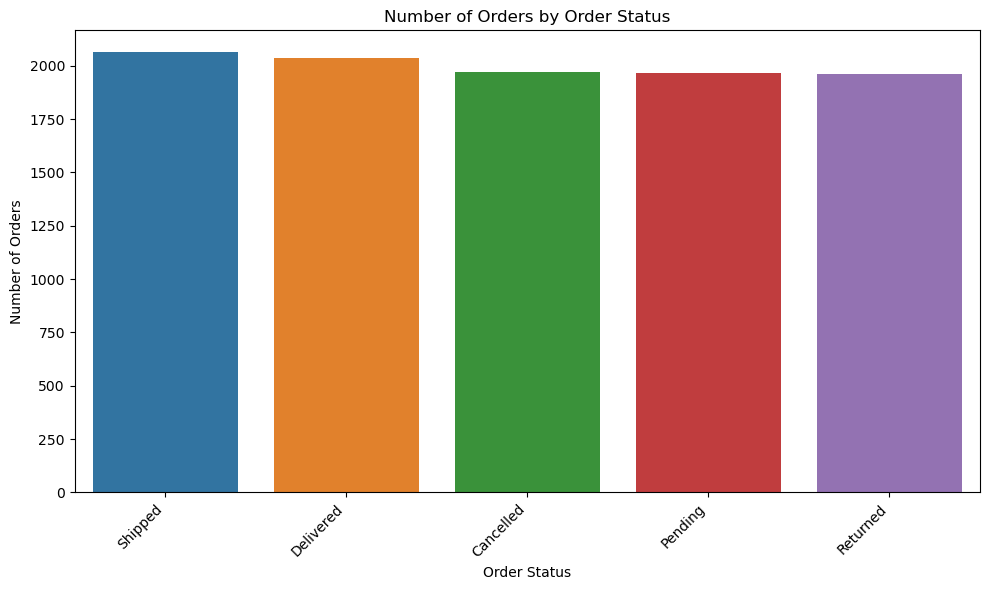

In [33]:
# Visualize the number of orders by order status
plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='number_of_orders', data=result, hue='order_status' ,legend=False)
plt.title('Number of Orders by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: This query provides a count of orders for each status (e.g., Shipped, Delivered, Pending, Returned). A high number of 'Pending' orders might indicate a need to streamline the shipping process, while a high 'Returned' count could signal issues with product quality or description accuracy.

**6. Payment Method Preferences**

Objective: To find out which payment methods are most commonly used by customers. This is important for optimizing the checkout process and negotiating with payment providers.

In [34]:
query = """
SELECT
    payment_method,
    COUNT(*) AS usage_count
FROM
    orders
GROUP BY
    payment_method
ORDER BY
    usage_count DESC;
"""
result = pd.read_sql_query(query, conn)
display(result)

,payment_method,usage_count
0,Cash on Delivery,3409
1,PayPal,3301
2,Credit Card,3290


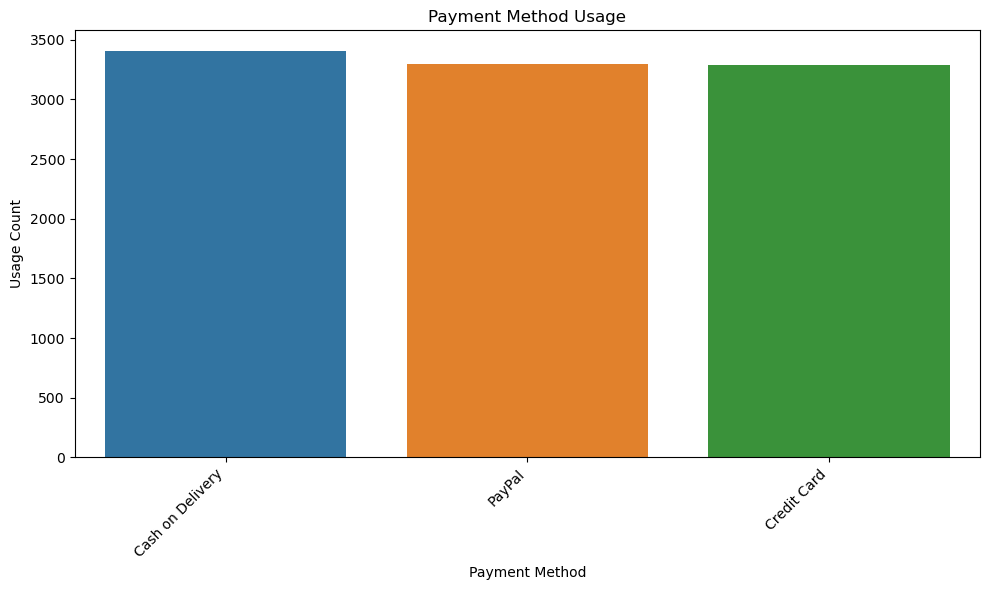

In [39]:
# Visualize payment method usage
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='usage_count', data=result,hue='payment_method' ,legend=False)
plt.title('Payment Method Usage')
plt.xlabel('Payment Method')
plt.ylabel('Usage Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: By counting the occurrences of each payment method, this query highlights customer preferences. If a particular method is overwhelmingly popular, it should be prominently featured. Offering a variety of popular payment options can help reduce cart abandonment.

**7. Monthly Sales Trends**

Objective: To analyze sales trends over time. Understanding seasonal patterns and sales growth is essential for financial forecasting and strategic planning.

In [41]:
query = """
SELECT
    STRFTIME('%Y-%m', order_date) AS sales_month,
    SUM(quantity * unit_price) AS monthly_revenue
FROM
    orders
GROUP BY
    sales_month
ORDER BY
    sales_month;
"""
result = pd.read_sql_query(query, conn)
display(result)

,sales_month,monthly_revenue
0,2022-08,59094
1,2022-09,161540
2,2022-10,226862
3,2022-11,217207
4,2022-12,182328
5,2023-01,194910
6,2023-02,160193
7,2023-03,226185
8,2023-04,229076
9,2023-05,236284


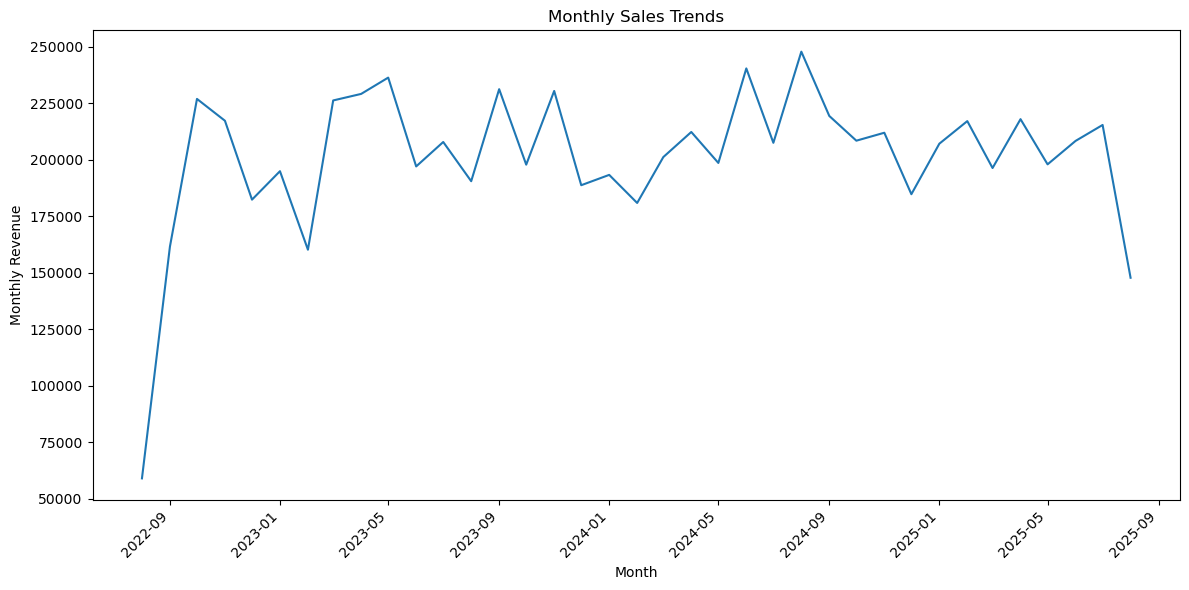

In [42]:
# Ensure sales_month is in datetime format for plotting
result['sales_month'] = pd.to_datetime(result['sales_month'])

# Visualize monthly revenue trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='sales_month', y='monthly_revenue', data=result)
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Monthly Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: This query groups sales by month and year, calculating the total revenue for each period. The output can be visualized as a line chart to easily spot trends, seasonality, and the overall growth trajectory of the business.

In [51]:
# Find the total number of orders placed each year.
query="""

SELECT 
    strftime('%Y', order_date) AS year,
    COUNT(DISTINCT order_id) AS total_orders
FROM orders
GROUP BY year
ORDER BY year;
"""
result = pd.read_sql_query(query, conn)

result

,year,total_orders
0,2022,1167
1,2023,3363
2,2024,3315
3,2025,2155


**8. Loyal Customer Analysis**

Objective: To identify the customers who make purchases most frequently. Loyal customers are valuable assets, and understanding who they are can help with retention programs and targeted marketing.

In [45]:
query = """
SELECT
    customer_id,
    COUNT(DISTINCT order_id) AS number_of_orders,
    SUM(quantity * unit_price) AS total_spent
FROM
    orders
GROUP BY
    customer_id
ORDER BY
    number_of_orders DESC, total_spent DESC
LIMIT 10;
"""
result = pd.read_sql_query(query, conn)
display(result)

,customer_id,number_of_orders,total_spent
0,CUST1244,9,5778
1,CUST5023,8,7057
2,CUST2716,7,8200
3,CUST3877,7,7130
4,CUST3967,7,6671
5,CUST2576,7,5775
6,CUST1628,7,5415
7,CUST4924,7,3974
8,CUST2133,7,3348
9,CUST2192,7,3041


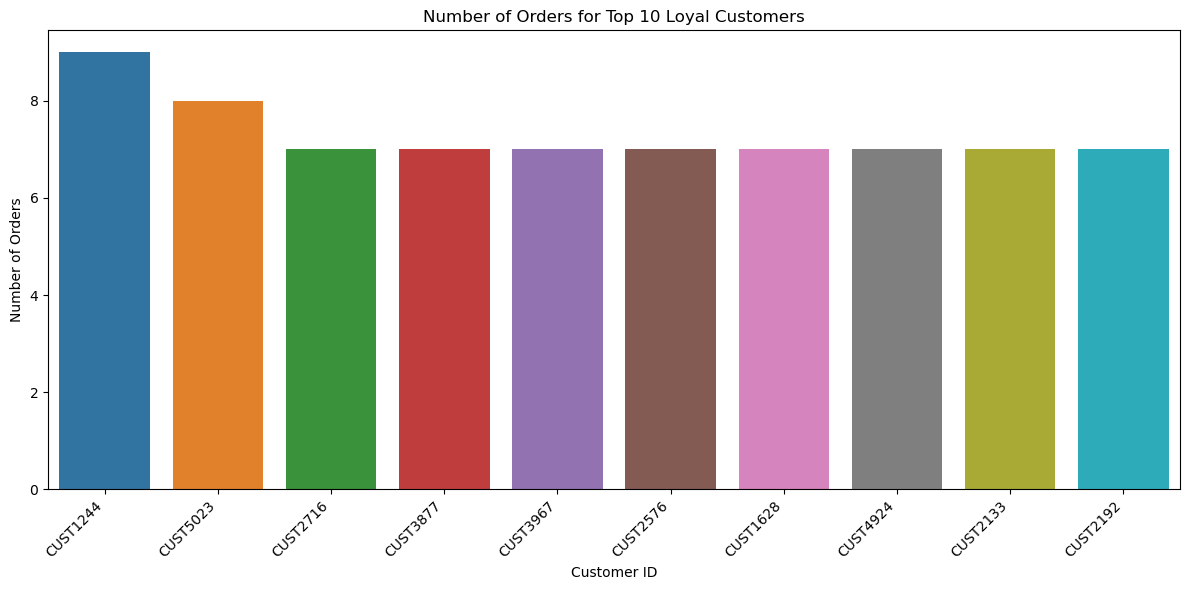

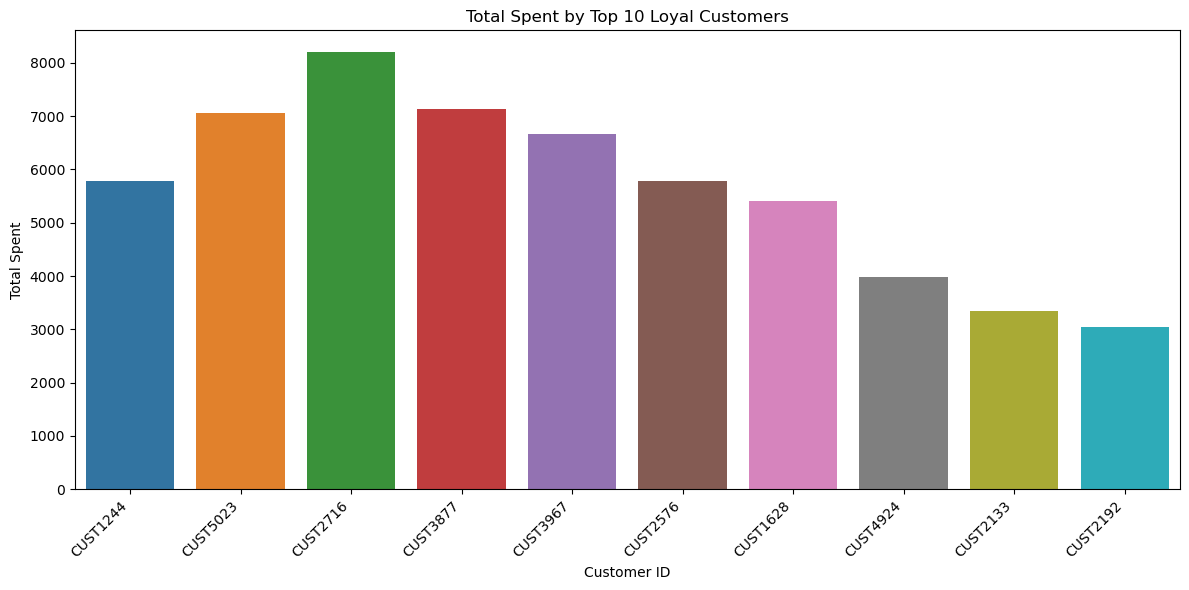

In [47]:
# Visualize number of orders for loyal customers
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='number_of_orders', data=result,hue='customer_id' ,legend=False)
plt.title('Number of Orders for Top 10 Loyal Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize total spent by loyal customers
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_id', y='total_spent', data=result,hue='customer_id' ,legend=False)
plt.title('Total Spent by Top 10 Loyal Customers')
plt.xlabel('Customer ID')
plt.ylabel('Total Spent')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Analysis: This query calculates the number of unique orders and the total money spent for each customer. By sorting it, we can find the most valuable customers who not only buy frequently but also spend a lot of money. These insights can be used for loyalty programs or special offers.

In [ ]:
# Find the customer churn rate: percentage of customers who signed up in 2022 but didn’t place any order in 2023.

In [53]:
query="""
WITH customers_2022 AS (
    SELECT customer_id
    FROM orders
    WHERE strftime('%Y', signup_date) = '2022'
),
customers_ordered_2023 AS (
    SELECT DISTINCT customer_id
    FROM orders
    WHERE strftime('%Y', order_date) = '2023'
)
SELECT 
    ROUND(100.0 * 
        (COUNT(c.customer_id) - COUNT(co.customer_id)) / COUNT(c.customer_id), 2
    ) AS churn_rate_percentage
FROM customers_2022 c
LEFT JOIN customers_ordered_2023 co
    ON c.customer_id = co.customer_id;

"""
result = pd.read_sql_query(query, conn)

result

,churn_rate_percentage
0,37.64


In [54]:
# Calculate the percentage of repeat customers vs one-time customers

In [56]:
query="""
WITH customer_spending AS (
    SELECT 
        customer_id,
        country,
        SUM(quantity * unit_price) AS total_spent
    FROM orders
    GROUP BY customer_id, country
)
SELECT 
    country,
    ROUND(AVG(total_spent), 2) AS avg_clv
FROM customer_spending
GROUP BY country
ORDER BY avg_clv DESC;


"""
result = pd.read_sql_query(query, conn)
result

,country,avg_clv
0,France,1833.26
1,USA,1817.58
2,China,1781.20
3,Japan,1747.58
4,Brazil,1736.14
5,India,1691.80
6,Australia,1682.63
7,UK,1654.21
8,Canada,1643.67
9,Germany,1616.77
